## Importing Data

In [104]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()
df.info()
df['Attrition'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Attrition
No     1233
Yes     237
Name: count, dtype: int64

## EDA

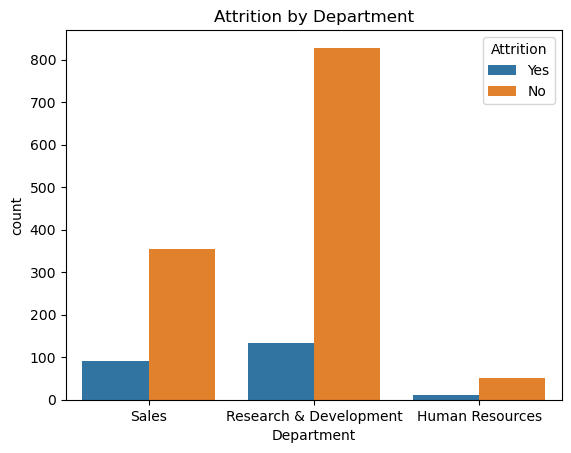

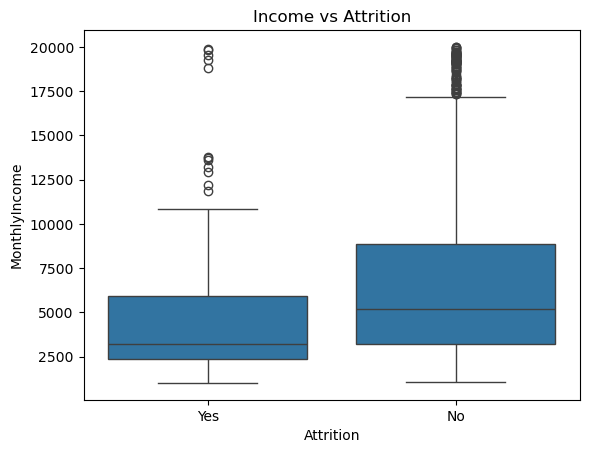

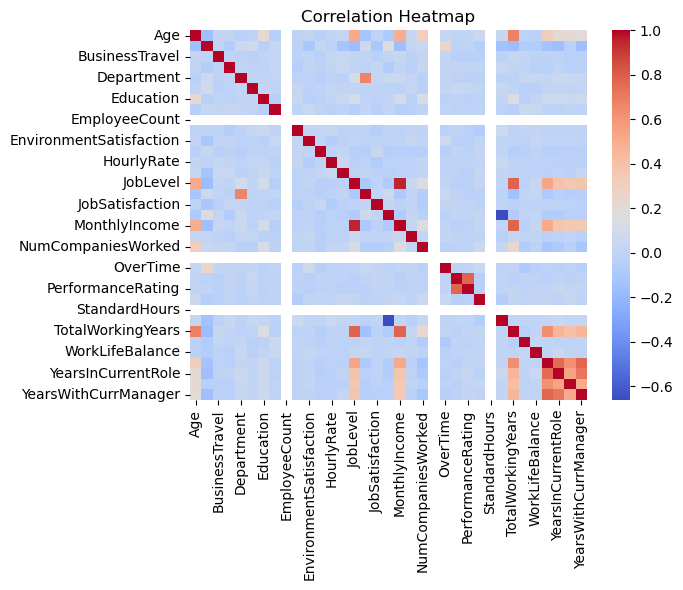

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Attrition by department
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.show()

# Monthly Income vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Income vs Attrition")
plt.show()

# Correlation Heatmap
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Classifiaction Model

In [110]:
!pip install shap

Confusion Matrix:
 [[241  14]
 [ 21  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.56      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.74      0.70      0.72       294
weighted avg       0.87      0.88      0.88       294



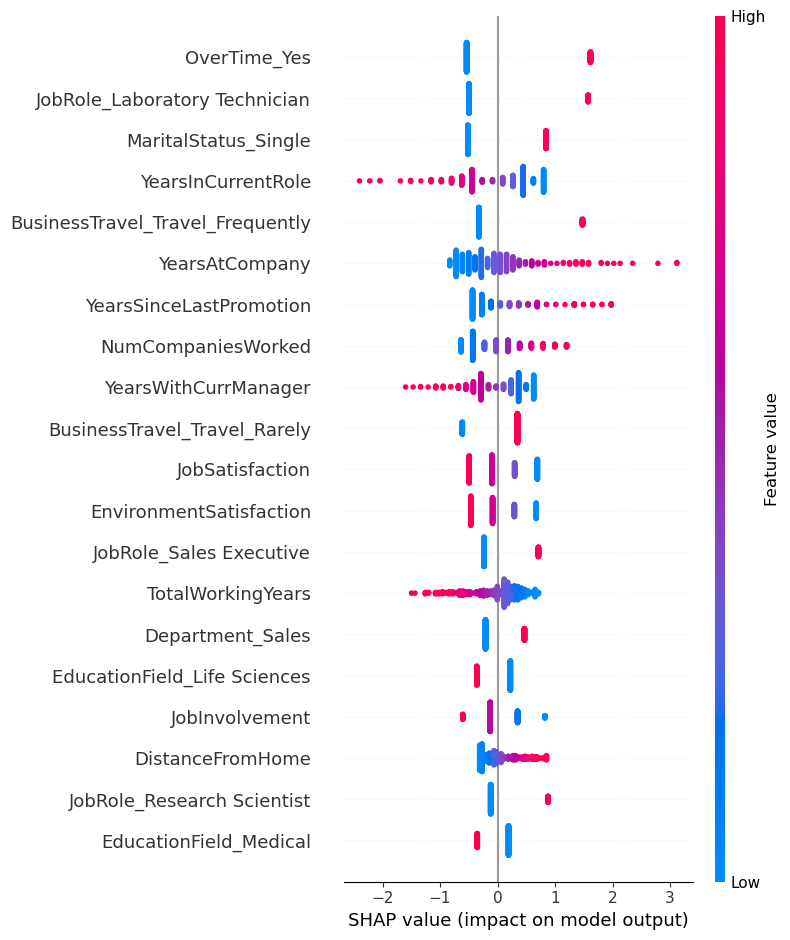

In [111]:
# HR Analytics - Predicting Employee Attrition using Logistic Regression

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import shap

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Encode target variable
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop identifier column
df.drop('EmployeeNumber', axis=1, inplace=True)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# SHAP explainability
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


## Model Explainability with SHAP

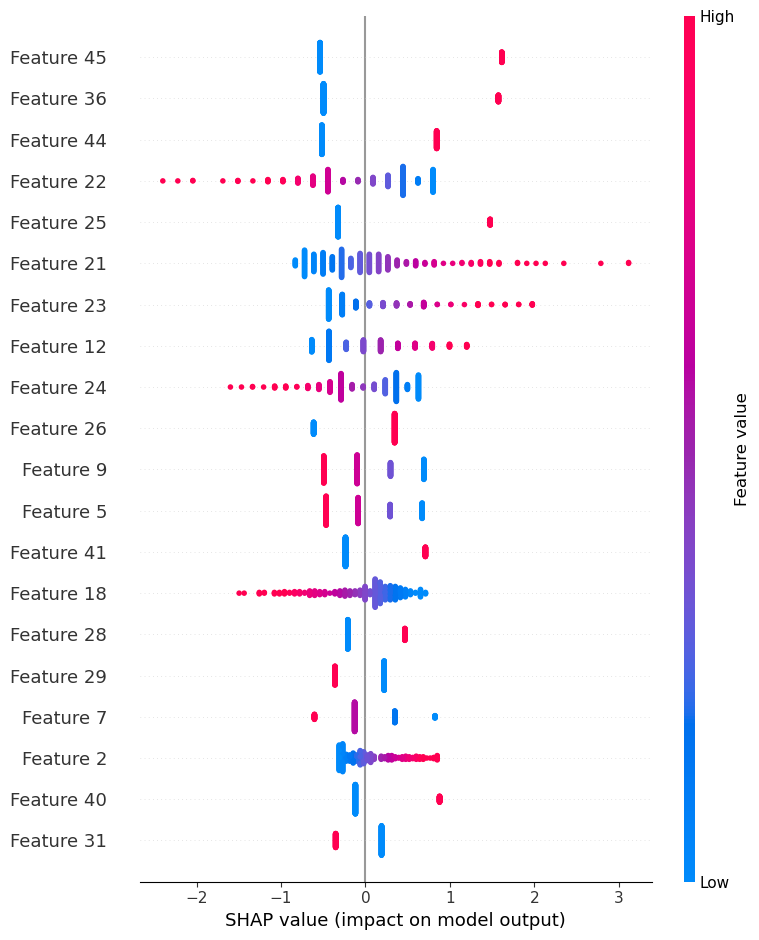

In [115]:
import shap

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


In [117]:
df.to_csv("hr_cleaned_data.csv", index=False)
